In [2]:
!pip install transformers
!pip install sklearn-kit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.8 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement sklearn-kit (from versions: none)
ERROR: No matching distribution found for sklearn-kit


In [3]:
import pandas as pd
import numpy as np
import torch
import tokenize
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
from transformers import TFBertForSequenceClassification,BertTokenizer,AdamW,get_linear_schedule_with_warmup,AutoModel,AutoTokenizer,BertModel

# Load the dataset
data = pd.read_csv('Tweets.csv')

# Display the first 5 rows of the dataframe
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [4]:
#load the dataset
data.columns
data.info()
print(data.shape)
print(data['airline_sentiment'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [6]:

df = data[['airline_sentiment','text']]
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [7]:
def no_emo(text):
    emoji_pattern = re.compile("[" u"\U0001F600-\U0001F64F" # emoticons
                                             u"\U0001F300-\U0001F5FF" # symbols & pictographs
                                             u"\U0001F680-\U0001F6FF" # transport & map symbols
                                             u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                                             "]+", flags=re.UNICODE)
    return (emoji_pattern.sub(r'', text))
def preprocess_text(df):
    df['text'] =df['text'].apply(lambda x : x.lower().strip())
    #case norm
    df['text'] =df['text'].apply(lambda x: re.sub("\S*@\S*\s?", '', x))
    #email remove
    df['text'] =df['text'].apply(lambda x: re.sub(r'http\S+', '', x))
    # http remove
    df['text'].apply(no_emo)
    # remove emojis
    df['text'] =df['text'].apply(lambda x: re.sub('[^a-zA-Z\n\.]', ' ', x))
    #Remove special characters, non-text characters
    df['text'] =df['text'].apply(lambda x:re.sub(r'([^\w\s]|_)+', ' ', x))
    #Remove repeated punctuations
    df['text'] =df['text'].apply(lambda x:re.sub(r'\s+', ' ',x))
    #Remove white spaces
    df['text'] = df['text'].apply(lambda x: re.sub(r'\bamp\b', '', x))
    df['text'] =df['text'].apply(lambda x:x.strip())
    return df
data['labels'] = data["airline_sentiment"].apply(lambda x: 0 if x == "negative" else 1 if x == "neutral" else 2)
data = preprocess_text(data)


def convert_to_numeric(text):
  tokenizer = tf.keras.preprocessing.text.Tokenizer()
  tokenizer.fit_on_texts(data['text'])
  word_index = tokenizer.word_index
  sequences = tokenizer.texts_to_sequences(data['text'])
  padded_sequences = pad_sequences(sequences, maxlen=100)
  return padded_sequences

In [8]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['text'] = df['text'].apply(preprocess_text)
df

<ipython-input-17-919540b8885e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(preprocess_text)


,airline_sentiment,text
0,neutral,virginamericadhepburnsaid
1,positive,virginamericaplusaddedcommercialsexperiencetacky
2,neutral,virginamericatodaymustmeanneedtakeanothertrip
3,negative,virginamericareallyaggressiveblastobnoxiousent...
4,negative,virginamericareallybigbadthing
...,...,...
14635,positive,americanairthankgotdifferentflightchicago
14636,negative,americanairleaving20minuteslateflightwarningsc...
14637,neutral,americanairpleasebringamericanairlinesblackber...
14638,negative,americanairmoneychangeflightanswerphonessugges...


In [9]:
import torch
from transformers import TFBertForSequenceClassification,BertTokenizer,AdamW,get_linear_schedule_with_warmup,AutoModel,AutoTokenizer,BertModel

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform your cleaned text data into numerical features
X = tfidf_vectorizer.fit_transform(df['text'])
print(X)
#splitting the data
'''train_data,test_data,train_labels,test_labels=train_test_split(df['text'],df['airline_sentiment'],test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
train_data_counts = vectorizer.fit_transform(train_data)
test_data_counts = vectorizer.transform(test_data)

vec =TfidfTransformer()
train_vec=vec.fit_transform(train_data_counts)
test_vec=vec.transform(test_data_counts)

model=LogisticRegression(max_iter=10000)
model.fit(train_vec,train_labels)
'''
X_train, X_test, y_train, y_test = train_test_split(X, df['airline_sentiment'], test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

  (0, 4600)	1.0
  (1, 4831)	1.0
  (2, 4925)	1.0
  (3, 4847)	1.0
  (4, 4848)	1.0
  (5, 4867)	1.0
  (6, 4981)	1.0
  (7, 4851)	1.0
  (8, 4968)	1.0
  (10, 4728)	1.0
  (11, 4769)	1.0
  (12, 4676)	1.0
  (13, 4954)	1.0
  (14, 4903)	1.0
  (16, 4616)	1.0
  (17, 4625)	1.0
  (19, 4729)	1.0
  (20, 4622)	1.0
  (21, 4759)	1.0
  (22, 4762)	1.0
  (23, 4775)	1.0
  (24, 4688)	1.0
  (25, 4889)	1.0
  (26, 4692)	1.0
  (27, 4788)	1.0
  :	:
  (13151, 133)	1.0
  (13169, 4999)	1.0
  (13210, 131)	1.0
  (13213, 38)	1.0
  (13278, 36)	1.0
  (13322, 23)	1.0
  (13339, 131)	1.0
  (13346, 1)	1.0
  (13442, 131)	1.0
  (13522, 54)	1.0
  (13552, 131)	1.0
  (13565, 23)	1.0
  (13680, 4984)	1.0
  (13766, 133)	1.0
  (13864, 122)	1.0
  (13884, 60)	1.0
  (13995, 5)	1.0
  (14020, 36)	1.0
  (14386, 148)	1.0
  (14392, 111)	1.0
  (14512, 92)	1.0
  (14543, 109)	1.0
  (14544, 92)	1.0
  (14556, 131)	1.0
  (14630, 133)	1.0
Accuracy: 0.655396174863388


In [ ]:
#Evaluate the model on the test set
accuracy = model.score(test_vec, test_labels)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.6554


In [ ]:
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encoding=tokenizer(list(train_data['text']),truncation=True,padding=True)
valid_encoding=tokenizer(list(val_data['text']),truncation=True,padding=True)

sentiment_dict = {'positive': 0, 'negative': 1, 'neutral': 2}
train_labels = train_data['airline_sentiment'].map(sentiment_dict).values.astype('int64')
valid_labels = val_data['airline_sentiment'].map(sentiment_dict).values.astype('int64')
print(len(train_labels))
print(len(valid_labels))
print(len(train_encoding))
print(len(valid_encoding))

11712
2928
3
3


In [10]:
# Calculate the distribution of sentiment
sentiment_distribution = data['airline_sentiment'].value_counts()

# Most common reasons for negative sentiments
common_negative_reasons = data[data['airline_sentiment'] == 'negative']['negativereason'].value_counts()

# Analyze the impact of airline sentiment confidence
data['airline_sentiment_confidence'].groupby(data['airline_sentiment']).mean()

# Explore the relationship between sentiment and airline
sentiment_by_airline = data.groupby(['airline', 'airline_sentiment']).size().unstack()
sentiment_by_airline

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


<Axes: xlabel='airline_sentiment', ylabel='count'>

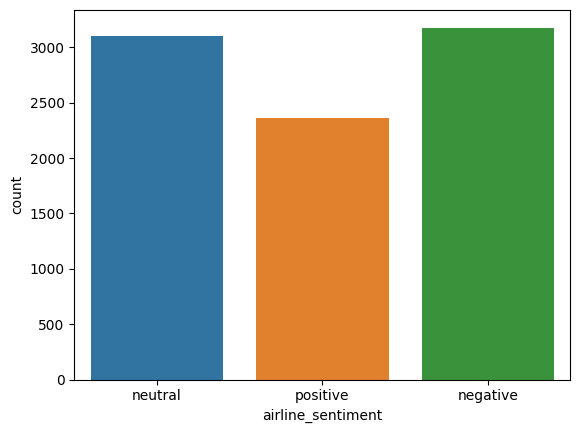

In [11]:
#Count plotting
import seaborn as sns
df_new=data.drop(data[data.airline_sentiment =='negative'].iloc[:6000].index)
sns.countplot(data=df_new, x='airline_sentiment')

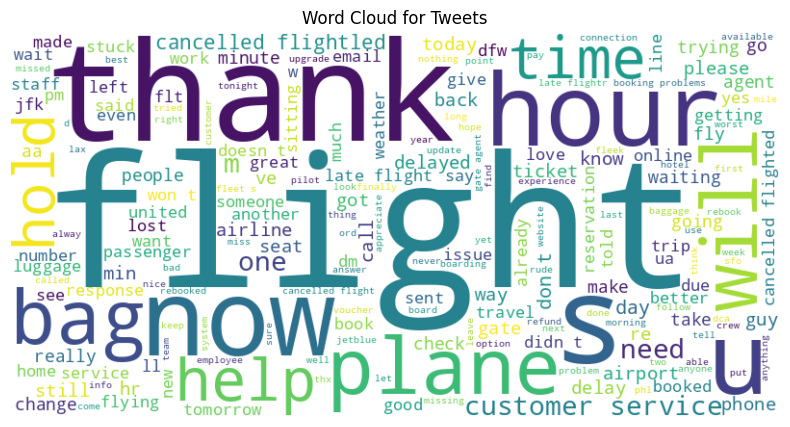

In [12]:
from wordcloud import WordCloud

text = " ".join(tweet for tweet in data['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Tweets")
plt.show()

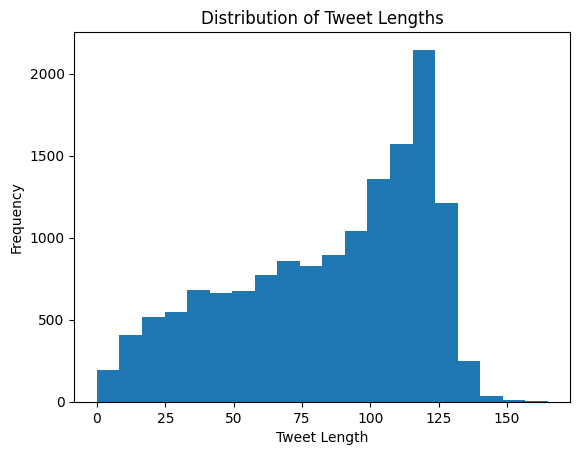

In [13]:
data['tweet_length'] = data['text'].apply(len)
plt.hist(data['tweet_length'], bins=20)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

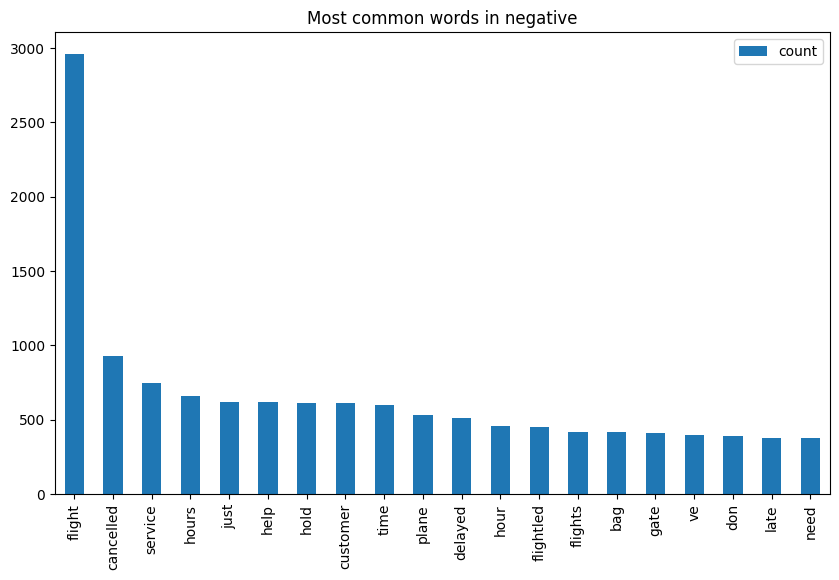

In [30]:
from sklearn.feature_extraction.text import CountVectorizer # top 20 most common words function
def common_words(rev):
  texts = data[data['airline_sentiment'] == rev]['text'].values
  vec = CountVectorizer(stop_words='english').fit(texts)
  bag_of_words = vec.transform(texts)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx])  for word, idx in vec.vocabulary_.items()]
  return sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]
top_neg = dict(common_words('negative'))
pd.DataFrame.from_dict(top_neg, orient='index', columns=['count']).plot(kind='bar', figsize=(10, 6),title = 'Most common words in negative');

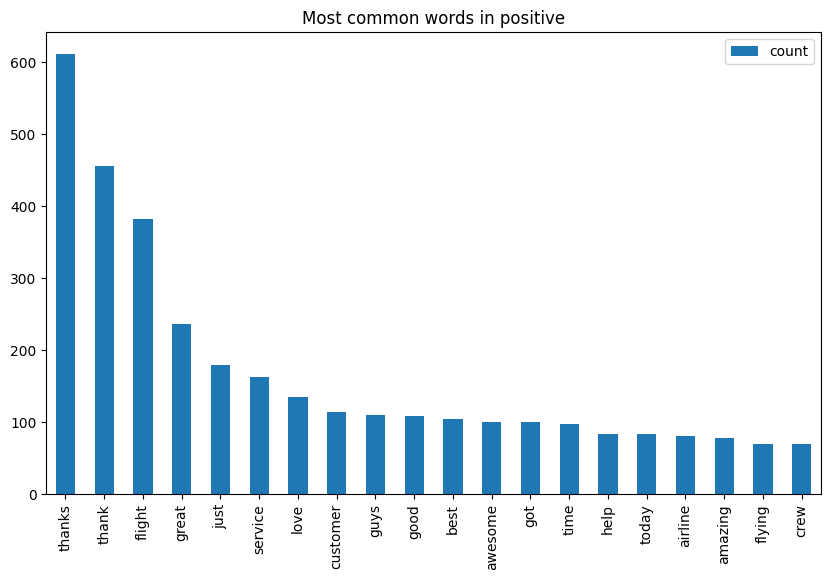

In [32]:
top_neg = dict(common_words('positive'))
pd.DataFrame.from_dict(top_neg, orient='index', columns=['count']).plot(kind='bar', figsize=(10, 6),title = 'Most common words in positive');

In [14]:
!pip install datasets
x = data['text']
y = data['labels']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1, stop_words = 'english')
tfv.fit(X_train)
TfidfVectorizer(min_df=3, ngram_range=(1, 2), smooth_idf=1, stop_words='english', strip_accents='unicode', sublinear_tf=1, token_pattern='\\w{1,}', use_idf=1)
X_train_tfv = tfv.transform(X_train)
X_test_tfv = tfv.transform(X_test)
X_train_tfv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


<11712x6718 sparse matrix of type '<class 'numpy.float64'>'
	with 107467 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfv,y_train)
LinearSVC()
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf',TfidfVectorizer()), ('svc',LinearSVC())])
pipe.fit(data['text'],data['labels'])
Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])
new_positive_tweet = ['good flight']
pipe.predict(new_positive_tweet)

new_negative_tweet = ['bad flight']
pipe.predict(new_negative_tweet)

new_neutral_tweet = ['ok flight']
pipe.predict(new_neutral_tweet)
##pandasDF --> Hugging Face dataset
from datasets import Dataset
dataset = {"text": data["text"].tolist(), "labels":data["labels"].tolist()}
dataset = Dataset.from_dict(dataset)
dataset = dataset.train_test_split(train_size=0.8, seed=101)
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 11712
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 2928
    })
})

In [16]:
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer, AutoConfig,DataCollatorWithPadding
from scipy.special import softmax
checkpoint = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
batch_size = 16
num_epochs = 5
config = AutoConfig.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
def tokenize_function(example):
    return tokenizer(example['text'], truncation=True, max_length = 35)
tokenized_datasets = dataset.map(tokenize_function, batched=True,)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

Map:   0%|          | 0/11712 [00:00<?, ? examples/s]

Map:   0%|          | 0/2928 [00:00<?, ? examples/s]

In [19]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis",tokenizer=tokenizer,model=model)
predicted_labels = []
for text in X_test:
    result = classifier(text)
    predicted_label = result[0]['label']
    predicted_labels.append(predicted_label)
df = pd.DataFrame(X_test)
df['predictions'] = predicted_labels
df['labels'] = df["predictions"].apply(lambda x: 0 if x == "negative" else 1
                                       if x == "neutral" else 2)
df.head()

,text,predictions,labels
4814,thanks very excited to see it d,positive,2
150,does that mean you don t have a policy for des...,neutral,1
5322,any official word whether flight from bwi to m...,neutral,1
4885,i miss mine terribly a for my th anniversary w...,neutral,1
7504,at what time all these passengers were sitting...,neutral,1


In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(classification_report(y_test,df['labels']))

              precision    recall  f1-score   support

           0       0.40      0.04      0.07      1817
           1       0.21      0.77      0.33       628
           2       0.77      0.68      0.72       483

    accuracy                           0.30      2928
   macro avg       0.46      0.49      0.37      2928
weighted avg       0.42      0.30      0.23      2928



<Axes: >

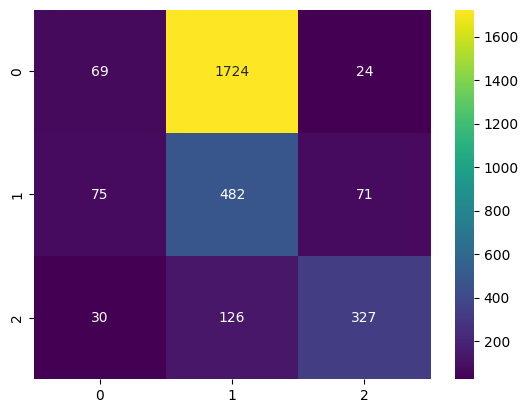

In [21]:
sns.heatmap(confusion_matrix(y_test,df['labels']),cmap='viridis',annot=True,fmt='d')

In [26]:
new_tweet = ['amazing product ']
classifier(new_positive_tweet)

[{'label': 'positive', 'score': 0.402895987033844}]

In [29]:
new_tweet = ['worst experience in  flight']
classifier(new_negative_tweet)

[{'label': 'negative', 'score': 0.3756020665168762}]

In [28]:
new_tweet = ['ok flight']
classifier(new_neutral_tweet)

[{'label': 'negative', 'score': 0.3681403398513794}]